In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('insurance_claims_cleaned_fixed.csv')

# Incident Characteristics Analysis

We will analyze incident Type, Incident Severity, and Collision Type to identify fraud patterns.

In [15]:
df.groupby('fraud_reported')['incident_type'].value_counts()

fraud_reported  incident_type           
No              Multi-vehicle Collision     305
                Single Vehicle Collision    286
                Vehicle Theft                86
                Parked Car                   76
Yes             Single Vehicle Collision    117
                Multi-vehicle Collision     114
                Parked Car                    8
                Vehicle Theft                 8
Name: count, dtype: int64

In [16]:
df.groupby('fraud_reported')['incident_type'].value_counts(normalize=True)

fraud_reported  incident_type           
No              Multi-vehicle Collision     0.405046
                Single Vehicle Collision    0.379814
                Vehicle Theft               0.114210
                Parked Car                  0.100930
Yes             Single Vehicle Collision    0.473684
                Multi-vehicle Collision     0.461538
                Parked Car                  0.032389
                Vehicle Theft               0.032389
Name: proportion, dtype: float64

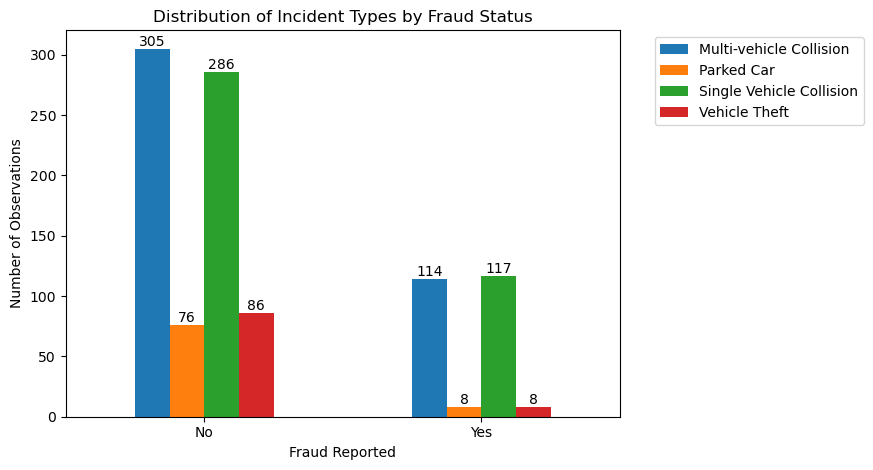

In [17]:
# Visualize incident type distribution by fraud status
ax = df.groupby('fraud_reported')['incident_type'].value_counts().unstack().plot(kind='bar', stacked=False)

# Add number of observations on top of each bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Fraud Reported')
plt.ylabel('Number of Observations')

plt.title('Distribution of Incident Types by Fraud Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Key Insights:

**High Risk:**
- Collisions (especially single vehicle) have much higher fraud rates
- Single vehicle collisions show the highest fraud probability


**Low Risk:**- Vehicle theft claims have lower fraud rates
- Parked car incidents are much less likely to be fraudulent

In [18]:
# Now let's take a look at incident severity to see how it affects fraud reported
df.groupby('fraud_reported')['incident_severity'].value_counts()

fraud_reported  incident_severity
No              Minor Damage         316
                Total Loss           244
                Major Damage         109
                Trivial Damage        84
Yes             Major Damage         167
                Minor Damage          38
                Total Loss            36
                Trivial Damage         6
Name: count, dtype: int64

In [19]:
df.groupby('fraud_reported')['incident_severity'].value_counts(normalize=True)

fraud_reported  incident_severity
No              Minor Damage         0.419655
                Total Loss           0.324037
                Major Damage         0.144754
                Trivial Damage       0.111554
Yes             Major Damage         0.676113
                Minor Damage         0.153846
                Total Loss           0.145749
                Trivial Damage       0.024291
Name: proportion, dtype: float64

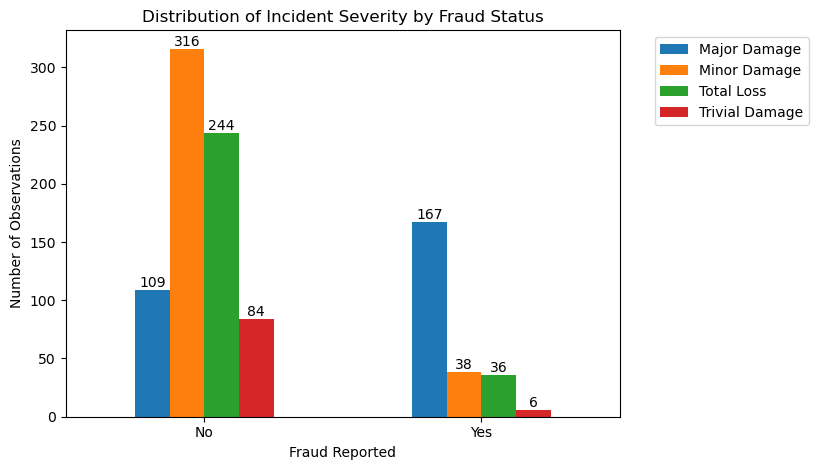

In [21]:
# Visualize incident severity distribution by fraud status
ax = df.groupby('fraud_reported')['incident_severity'].value_counts().unstack().plot(kind='bar', stacked=False)

# Add number of observations on top of each bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Fraud Reported')
plt.ylabel('Number of Observations')

plt.title('Distribution of Incident Severity by Fraud Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Incident Severity Analysis Results

The analysis reveals that **Major Damage claims have an exceptionally high fraud rate**, making them the most critical risk factor for fraud detection.

### Key Findings:

- **Major Damage claims** show significantly higher fraud rates than other severity levels

- **Major Damage** represents the highest value claims, so focusing detection efforts here maximizes impact- The stark difference suggests potential organized fraud targeting high-value claims

In [22]:
df.groupby('fraud_reported')['collision_type'].value_counts(normalize=True)

fraud_reported  collision_type 
No              Side Collision     0.273572
                Rear Collision     0.266932
                Front Collision    0.244356
                Unknown            0.215139
Yes             Rear Collision     0.368421
                Front Collision    0.283401
                Side Collision     0.283401
                Unknown            0.064777
Name: proportion, dtype: float64

In [23]:
counts = df.groupby('fraud_reported')['collision_type'].value_counts()
print(counts)

fraud_reported  collision_type 
No              Side Collision     206
                Rear Collision     201
                Front Collision    184
                Unknown            162
Yes             Rear Collision      91
                Front Collision     70
                Side Collision      70
                Unknown             16
Name: count, dtype: int64


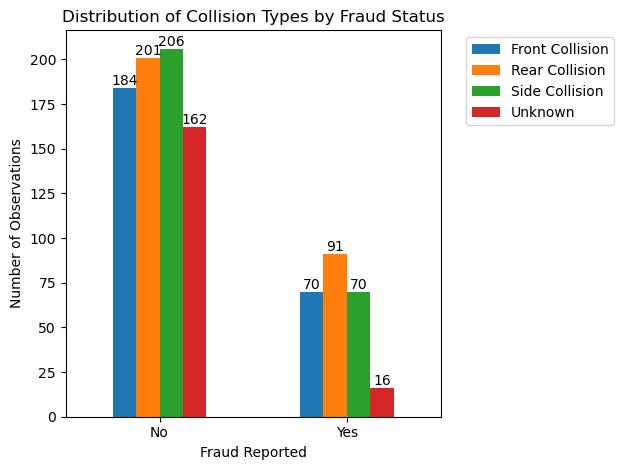

In [24]:
# Visualize collision type distribution by fraud status
ax = df.groupby('fraud_reported')['collision_type'].value_counts().unstack().plot(kind='bar', stacked=False)

# Add number of observations on top of each bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Fraud Reported')
plt.ylabel('Number of Observations')
plt.title('Distribution of Collision Types by Fraud Status')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Collision Type Risk Assessment

### Analysis:

**High Risk:**
- Rear collision claims should receive extra scrutiny as they're more likely to be in fraudulent cases
- This pattern suggests that fraudsters may prefer rear collision scenarios, possibly because they're easier to stage or provide better opportunities for exaggerated claims

**Moderate Risk:**
- Front and side collisions show relatively balanced distributions between fraud and non-fraud cases

**Low Risk:**
- Claims with "Unknown" collision types are much less likely to be fraudulent

# 🔍 Complete EDA Analysis Summary

Based on the entire incident characteristics analysis, here's the comprehensive picture:

## 📋 What Was Analyzed:
This EDA systematically examined fraud patterns across three critical dimensions:

1. **Incident Types** (collisions, theft, parked car)
2. **Incident Severity** (trivial to major damage)  
3. **Collision Types** (front, rear, side, unknown)


## 🎯 Most Critical Discovery:

**Major Damage claims show exceptionally high fraud rates** - this represents the clearest fraud indicator in the dataset.

### Fraud Detection Priorities:

1. **Highest Priority:** Major damage severity claims

2. **High Priority:** Single vehicle collisions  3. **Moderate Priority:** Rear collision claims